In [34]:
%matplotlib inline

import matplotlib
import autograd.numpy as np
import matplotlib.pyplot as plt
import random
import math
from autograd import grad

def generateChevronData():
    xBounds = [-50, 50]
    yBounds = [-50, 50]
    totalPoints = 100
    
    points = []
    targets = []
    
    for i in range(0, totalPoints):
        x = random.randint(xBounds[0], xBounds[1])
        y = random.randint(yBounds[0], yBounds[1])
        
        if x >= y and x <= -y:
            points.append([1, x/50.0,y/50.0])
            targets.append(0)
        else:
            points.append([1, x/50.0,y/50.0])
            targets.append(1)
        
    return np.array(points), np.array(targets)
    
def plotScatter(points):
    xs = [x[1] for x in points]
    ys = [y[2] for y in points]
    
    plt.scatter(xs, ys)

In [35]:
def sigmoid(phi):
    return 1.0/(1.0 + np.exp(-phi))

def MSE(weights):
    localPoints = np.array(list(map(lambda x: (x[1] - weights[2])**2 + (x[2] - weights[3])**2 <= radius**2, points)))
    predictions = logisticPrediction(weights, points)
    return 1.0/2.0 * np.sum(np.power((targets - predictions), 2))

def logisticPrediction(weights, p):
    return np.array(list(map(lambda x: predict(weights, x), p))) 
    
def predict(weights, inputs):
    n = np.array([weights[0], weights[1]])
    i = np.array([weights[2] - inputs[1], weights[3] - inputs[2]])
#     n = np.array([weights[0], weights[1] - weights[3], weights[2] - weights[4]])
    return sigmoid(np.dot(n, i))

In [36]:
def computeGradient(weights, example, target):
    prediction = predict(weights, example)
    dE_dO = computeErrorDifferential(prediction, target)
    
    dO_dZ = prediction * (1-prediction)
    
#     dZ_d0 = example[0]
    dZ_d1 = (weights[2] - example[1])
    dZ_d2 = (weights[3] - example[2])
    dZ_d3 = weights[0]
    dZ_d4 = weights[1]
    
    dE_dZ = dE_dO * dO_dZ
    
    grad = np.zeros(len(weights))#[0.0, 0.0, 0.0]
#     grad[0] = dZ_d0 * dE_dZ
    grad[0] = dZ_d1 * dE_dZ
    grad[1] = dZ_d2 * dE_dZ
    grad[2] = dZ_d3 * dE_dZ
    grad[3] = dZ_d4 * dE_dZ
    
    return grad

def computeErrorDifferential(prediction, target):
    return -(target - prediction)

In [37]:
def trainBoundaryHunter():
    weights = np.array([0.0, 0.0, 0.0, 0.0])
    
    print("Initial Loss: ", MSE(weights))
    for i in range(0, 10000):
        weights = computeStep(weights)
    
        if i % 1000 == 0:
            print("Loss After [i = " + str(i) + "]: " + str(MSE(weights)))
            print(weights)
            
    print("Trained Loss: ", MSE(weights))    
    print("Weights: ", weights)
    return weights

def computeStep(weights):
    localPoints = np.array(list(map(lambda x: (x[1] - weights[2])**2 + (x[2] - weights[3])**2 <= radius**2, points)))
    
    totalG = np.zeros(len(weights))
    for i in range(0, len(points)):
        if not localPoints[i]:
            continue
        
        g = computeGradient(weights, points[i], targets[i])
        totalG += g     
    
    weights -= totalG * 0.01
    return weights

Type 0:  35
Type 1:  65
Initial Loss:  12.5
Loss After [i = 0]: 12.4896604636
[-0.0011 -0.0022  0.      0.    ]
Loss After [i = 1000]: 7.01619845421
[-0.24309837 -1.83565085 -0.03854433 -0.11742453]
Loss After [i = 2000]: 6.05371072373
[-0.35404085 -3.29219824 -0.03948683 -0.12591145]
Loss After [i = 3000]: 5.92469600624
[-0.50321811 -4.34727416 -0.03965756 -0.12739535]
Loss After [i = 4000]: 5.82263152613
[-0.64069621 -5.16580556 -0.04088796 -0.13761197]
Loss After [i = 5000]: 5.79892869946
[-0.73377507 -5.87672474 -0.04169919 -0.14411149]
Loss After [i = 6000]: 5.80341635603
[-0.79654435 -6.50723148 -0.04226821 -0.14870504]
Loss After [i = 7000]: 5.81760541651
[-0.83902482 -7.07577665 -0.04268547 -0.15216365]
Loss After [i = 8000]: 5.83434665507
[-0.86819324 -7.5951614  -0.04300148 -0.15487535]
Loss After [i = 9000]: 5.85090188775
[-0.88884129 -8.07452671 -0.04324688 -0.15706148]
Trained Loss:  5.86630964776
Weights:  [-0.90420762 -8.52016302 -0.04344125 -0.1588589 ]

[ 1.41019     0

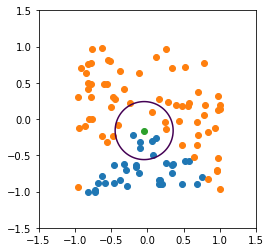

In [38]:
random.seed(1234)
points, targets = generateChevronData()

plt.axis([-1.5, 1.5, -1.5, 1.5])

# Plot points on graph
c1 = []
c2 = []

for i in range(0, len(points)):
    if targets[i] == 0:
        c1.append(points[i])
    else:
        c2.append(points[i])

print("Type 0: ", len(c1))
print("Type 1: ", len(c2))
        
plotScatter(c1)
plotScatter(c2)

radius = 0.4

weights = trainBoundaryHunter()

plt.scatter(weights[2], weights[3])

# n = np.array([weights[0] + weights[1] * weights[3] + weights[2] * weights[4], 
#               -weights[1], 
#               -weights[2]])

# byas = -1 * n[0]/n[2]
# Xcoef = -1 * n[1]/n[2]

print()
print(n)
print("\nLine")
print("B: " + str(byas))
print("XCoef: " + str(Xcoef))


x = np.linspace(-1.5, 1.5, 500)
y = np.linspace(-1.5, 1.5, 500)
X, Y = np.meshgrid(x,y)
F = (X - weights[2])**2 + (Y - weights[3])**2 - radius**2
plt.contour(X,Y,F,[0])

# plt.plot([-1.0, 1.0], [-1*Xcoef + byas, Xcoef + byas], 'k-')
plt.gca().set_aspect('equal')

plt.show()